# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

625

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Create variable for URL to begin Weather Map API Call
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Set variables and create lists
city_id = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start call counter 
record = 0
record_set = 1

# Print statement before beginning data retrieval
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Begin for statement to loop through the cities 
for i, city in enumerate(cities):  
   
    # Group cities in sets of 50 for logging purposes   
    if (i % 50 == 0 and i >= 50):
        record_set += 1
        record = 0
        
    # Increase counter by one 
    record += 1 
    
    try: 
        response = requests.get(f"{base_url}&q={city}").json() 
        city_id.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f'Processing Record {record} of Set {record_set} | {response["name"]}')
        
        
              
    # If no record found, skip to next city
    except:
        print("City not found. Skipping...")
              
    continue
              
# Print statement after completing data retrieval
print(f"-----------------------------")
print(f"Data Retrieval Complete")
print(f"-----------------------------")

Beginning Data Retrieval
-------------------------------
Processing Record 1 of Set 1 | Guerrero Negro
Processing Record 2 of Set 1 | Vaini
Processing Record 3 of Set 1 | Husavik
Processing Record 4 of Set 1 | Feijó
Processing Record 5 of Set 1 | Tuktoyaktuk
Processing Record 6 of Set 1 | East London
Processing Record 7 of Set 1 | Jamestown
Processing Record 8 of Set 1 | Upernavik
Processing Record 9 of Set 1 | Magdiwang
Processing Record 10 of Set 1 | Rikitea
Processing Record 11 of Set 1 | Sembakung
Processing Record 12 of Set 1 | Aksu
Processing Record 13 of Set 1 | Atbasar
Processing Record 14 of Set 1 | Palanga
Processing Record 15 of Set 1 | Bacolod City
Processing Record 16 of Set 1 | Hobyo
Processing Record 17 of Set 1 | Bambous Virieux
Processing Record 18 of Set 1 | Ouadda
City not found. Skipping...
City not found. Skipping...
Processing Record 21 of Set 1 | Norman Wells
Processing Record 22 of Set 1 | George Town
Processing Record 23 of Set 1 | Kamaishi
Processing Record 24

Processing Record 2 of Set 5 | Sakakah
Processing Record 3 of Set 5 | San Quintín
Processing Record 4 of Set 5 | Bingöl
City not found. Skipping...
Processing Record 6 of Set 5 | Beroroha
Processing Record 7 of Set 5 | Mount Gambier
City not found. Skipping...
Processing Record 9 of Set 5 | Ilulissat
Processing Record 10 of Set 5 | Tuatapere
Processing Record 11 of Set 5 | Bethel
Processing Record 12 of Set 5 | Kiryat Gat
Processing Record 13 of Set 5 | Gold Coast
Processing Record 14 of Set 5 | Ust-Kuyga
Processing Record 15 of Set 5 | Lorengau
Processing Record 16 of Set 5 | Zhalantun
Processing Record 17 of Set 5 | Waingapu
Processing Record 18 of Set 5 | Ponte San Pietro
Processing Record 19 of Set 5 | Samarai
Processing Record 20 of Set 5 | Vila Velha
Processing Record 21 of Set 5 | Prince Rupert
Processing Record 22 of Set 5 | Chitipa
Processing Record 23 of Set 5 | Cabo San Lucas
Processing Record 24 of Set 5 | Shingū
Processing Record 25 of Set 5 | Ahipara
Processing Record 26 

Processing Record 5 of Set 9 | Mahibadhoo
City not found. Skipping...
Processing Record 7 of Set 9 | Naze
Processing Record 8 of Set 9 | Kampot
Processing Record 9 of Set 9 | Fukuechō
Processing Record 10 of Set 9 | Kilindoni
Processing Record 11 of Set 9 | Te Anau
Processing Record 12 of Set 9 | Jiazi
Processing Record 13 of Set 9 | Escárcega
Processing Record 14 of Set 9 | Caucaia
Processing Record 15 of Set 9 | Hīrna
Processing Record 16 of Set 9 | Fairbanks
Processing Record 17 of Set 9 | Lākheri
City not found. Skipping...
Processing Record 19 of Set 9 | Souillac
Processing Record 20 of Set 9 | Klaksvík
Processing Record 21 of Set 9 | Province of Trapani
Processing Record 22 of Set 9 | Fort Walton Beach
Processing Record 23 of Set 9 | Pustoshka
Processing Record 24 of Set 9 | Coyhaique
Processing Record 25 of Set 9 | Bugarama
Processing Record 26 of Set 9 | Oddur
Processing Record 27 of Set 9 | Yumen
Processing Record 28 of Set 9 | Cirò Marina
Processing Record 29 of Set 9 | Lockh

Processing Record 8 of Set 13 | Rawson
Processing Record 9 of Set 13 | Smithers
Processing Record 10 of Set 13 | Puerto Madryn
Processing Record 11 of Set 13 | Whitehorse
Processing Record 12 of Set 13 | Barra Patuca
Processing Record 13 of Set 13 | Khorixas
Processing Record 14 of Set 13 | Raja
Processing Record 15 of Set 13 | Kumo
Processing Record 16 of Set 13 | Nacala
Processing Record 17 of Set 13 | Talaya
Processing Record 18 of Set 13 | Anadyr
City not found. Skipping...
City not found. Skipping...
Processing Record 21 of Set 13 | Paredon
Processing Record 22 of Set 13 | Voh
Processing Record 23 of Set 13 | Derzhavīnsk
Processing Record 24 of Set 13 | Nioro
Processing Record 25 of Set 13 | Kuusamo
-----------------------------
Data Retrieval Complete
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Create a dataframe to store the data
city_data = pd.DataFrame({'City': city_id, 'Lat': lat, 'Lng': lng, 'Max Temp': max_temp, 'Humidity': humidity, 'Cloudiness': cloudiness, 'Windspeed': wind_speed, 'Country': country, 'Date': date,
                            })

# Preview the dataframe
city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Windspeed,Country,Date
0,Guerrero Negro,27.98,-114.06,68.43,69,1,16.20,MX,1587957870
1,Vaini,-21.20,-175.20,73.96,87,96,17.40,TO,1587957834
2,Husavik,66.04,-17.34,28.40,92,0,2.24,IS,1587957829
3,Feijó,-8.16,-70.35,72.99,92,100,1.28,BR,1587958227
4,Tuktoyaktuk,69.45,-133.04,17.60,92,90,16.11,CA,1587957834


In [5]:
# Export the city data into a .csv
city_data.to_csv
city_data.count()

City          573
Lat           573
Lng           573
Max Temp      573
Humidity      573
Cloudiness    573
Windspeed     573
Country       573
Date          573
dtype: int64

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
# Get the indices of cities that have humidity over 100%.
humidity = city_data.loc[city_data["Humidity"] > 100].index
humidity

Int64Index([], dtype='int64')

In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

# Skipping step based on instructions above

In [8]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv

# Skipping step based on instructions above

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

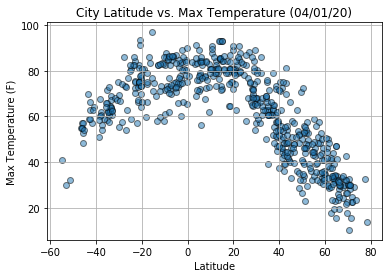

The code is plotting between city latitude and max temperatures. Based on the plot, cities with higher latitude tend to have low max temperatures.


In [9]:
# Determine x and y values 
plt.scatter(city_data["Lat"],city_data["Max Temp"], alpha = 0.5, edgecolors="k")

# Define title and label axis
plt.title("City Latitude vs. Max Temperature (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save figure
plt.savefig("CityLatitudevsTemperature.png")

# Show scatter plot
plt.show()

# Analyze findings
print(f"The code is plotting between city latitude and max temperatures. Based on the plot, cities with higher latitude tend to have low max temperatures.")

## Latitude vs. Humidity Plot

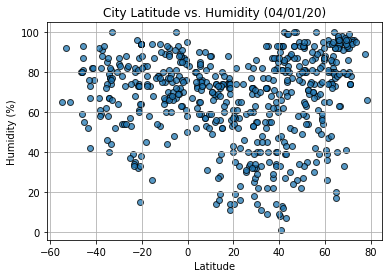

The code is plotting between city latitude and humidity. The datasets show no correlation between humidity (%) and latitude. A cluster of cities display high humidity ranges between 60% and 100%.


In [10]:
# Determine x and y values
plt.scatter(city_data["Lat"],city_data["Humidity"], alpha = 0.75, edgecolors="k")

# Define title and label axis
plt.title("City Latitude vs. Humidity (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save figure
plt.savefig("CityLatitudevsHumidity.png")

# Show scatter plot
plt.show()

# Analyze findings
print(f"The code is plotting between city latitude and humidity. The datasets show no correlation between humidity (%) and latitude. A cluster of cities display high humidity ranges between 60% and 100%.")

## Latitude vs. Cloudiness Plot

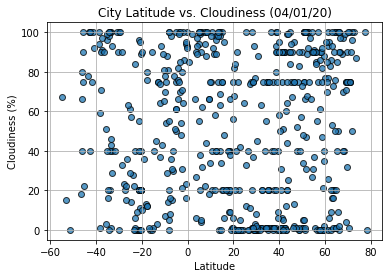

The code is plotting between city latitude and cloudiness. The datasets show no correlation between cloudiness (%) and latitude.


In [11]:
# Determine x and y values
plt.scatter(city_data["Lat"],city_data["Cloudiness"], alpha = 0.75, edgecolors="k")

# Define title and label axis
plt.title("City Latitude vs. Cloudiness (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save figure
plt.savefig("CityLatitudevsCloudiness.png")

# Show scatter plot
plt.show()

# Analyze findings
print(f"The code is plotting between city latitude and cloudiness. The datasets show no correlation between cloudiness (%) and latitude.")

## Latitude vs. Wind Speed Plot

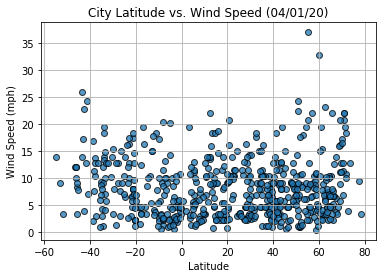

The code is plotting between city latitude and wind speed. A cluster of cities have low wind speeds ranging from 0 to 15 mph. Fewer cities have wind speeds ranging from 25 to 50 mph.


In [12]:
# Determine x and y values
plt.scatter(city_data["Lat"],city_data["Windspeed"], alpha= 0.75, edgecolors="k")

# Define title and label axis 
plt.title("City Latitude vs. Wind Speed (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save figure
plt.savefig("CityLatitudevsWindSpeed.png")

# Show scatter plot
plt.show()

# Analyze findings
print(f"The code is plotting between city latitude and wind speed. A cluster of cities have low wind speeds ranging from 0 to 15 mph. Fewer cities have wind speeds ranging from 25 to 50 mph.")

## Linear Regression

In [13]:
# OPTIONAL: Create a function to create Linear Regression plots

In [14]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = city_data.loc[pd.to_numeric(city_data["Lat"]).astype(float) > 0, :]
southern_hemisphere = city_data.loc[pd.to_numeric(city_data["Lat"]).astype(float) < 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8884001976385876
The linear regression shows a negative correlation. Based on the regression, the Northern Hemisphere temperature decreases as we move farther from the equator.


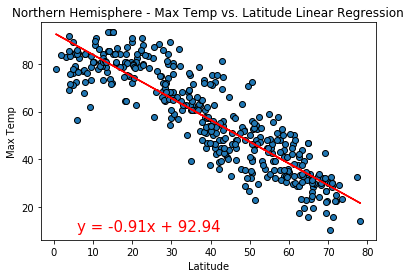

In [15]:
# Determine x and y values and cast to a specified dtype
x_values = pd.to_numeric(northern_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(northern_hemisphere['Max Temp']).astype(float)

# Calculate regression based on x and y values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Determine values to plot and annotate regression
plt.scatter(x_values,y_values, edgecolors="k")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Define title and axis labels
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.savefig("Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

# Print rvalue and analysis of regression
print(f"The r-squared is: {rvalue}")
print(f"The linear regression shows a negative correlation. Based on the regression, the Northern Hemisphere temperature decreases as we move farther from the equator.")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6793299280646784
The linear regression shows a positive correlation. Based on the regression, the Southern Hemisphere temperature increases as we move closer to the equator.


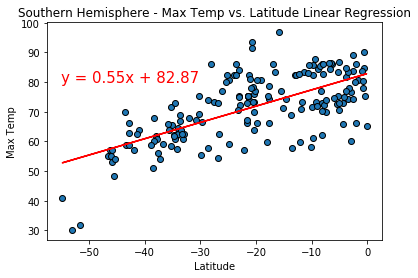

In [16]:
# Determine x and y values and cast to a specified dtype
x_values = pd.to_numeric(southern_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(southern_hemisphere['Max Temp']).astype(float)

# Calculate regression based on x and y values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Determine values to plot and annotate regression
plt.scatter(x_values,y_values,edgecolors="k")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,80),fontsize=15,color="red")

# Define title and axis labels
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.savefig("Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

# Print rvalue and analysis of regression
print(f"The r-squared is: {rvalue}")
print(f"The linear regression shows a positive correlation. Based on the regression, the Southern Hemisphere temperature increases as we move closer to the equator.")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.2699589538091343
The regression does not show any correlation between both datasets.
A cluster of cities have higher humidity (ranges from 60% to 100%).


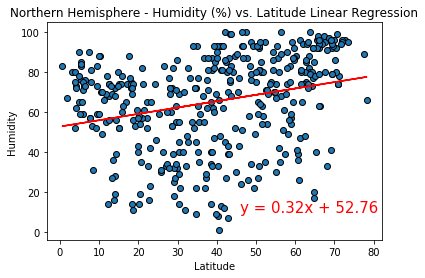

In [17]:
# Determine x and y values and cast to a specified dtype
x_values = pd.to_numeric(northern_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(northern_hemisphere['Humidity']).astype(float)

# Calculate regression based on x and y values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Determine values to plot and annotate regression
plt.scatter(x_values,y_values,edgecolors="k")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(46,10),fontsize=15,color="red")

# Define title and axis labels
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.savefig("Northern Hemisphere - Humidity vs. Latitude Linear Regression.png")

# Print rvalue and analysis of regression
print(f"The r-squared is: {rvalue}")
print(f"The regression does not show any correlation between both datasets.")
print(f"A cluster of cities have higher humidity (ranges from 60% to 100%).")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.07323465674847986
The regression does not show any correlation between both datasets.
A cluster of cities have higher humidity (ranges from 70% to 90%).


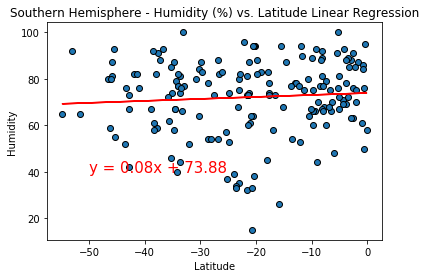

In [18]:
# Determine x and y values and cast to a specified dtype
x_values = pd.to_numeric(southern_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(southern_hemisphere['Humidity']).astype(float)

# Calculate regression based on x and y values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Determine values to plot and annotate regression
plt.scatter(x_values,y_values,edgecolors="k")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,40),fontsize=15,color="red")

# Define title and axis labels
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.savefig("Southern Hemisphere - Humidity vs. Latitude Linear Regression.png")

# Print rvalue and analysis of regression
print(f"The r-squared is: {rvalue}")
print(f"The regression does not show any correlation between both datasets.")
print(f"A cluster of cities have higher humidity (ranges from 70% to 90%).")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.08493376360640029
The regression does not show any correlation between both datasets. Cloudiness (%) does not display any relationship with latitude.


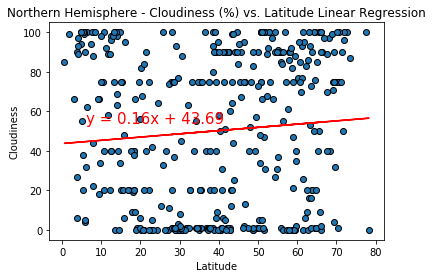

In [19]:
# Determine x and y values and cast to a specified dtype
x_values = pd.to_numeric(northern_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(northern_hemisphere['Cloudiness']).astype(float)

# Calculate regression based on x and y values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Determine values to plot and annotate regression
plt.scatter(x_values,y_values,edgecolors="k")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,54),fontsize=15,color="red")

# Define title and axis labels
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.savefig("Northern Hemisphere - Cloudiness vs. Latitude Linear Regression.png")

# Print rvalue and analysis of regression
print(f"The r-squared is: {rvalue}")
print(f"The regression does not show any correlation between both datasets. Cloudiness (%) does not display any relationship with latitude.")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0028127734910293987
The regression does not show any correlation between both datasets. Cloudiness (%) does not display any relationship with latitude.


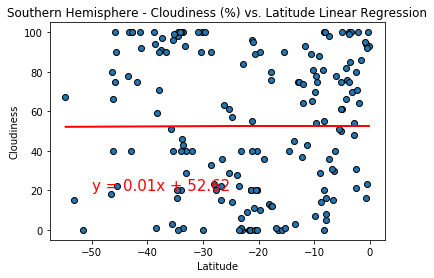

In [20]:
# Determine x and y values and cast to a specified dtype
x_values = pd.to_numeric(southern_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(southern_hemisphere['Cloudiness']).astype(float)

# Calculate regression based on x and y values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Determine values to plot and annotate regression
plt.scatter(x_values,y_values,edgecolors="k")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")

# Define title and axis labels
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.savefig("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression.png")

# Print rvalue and analysis of regression
print(f"The r-squared is: {rvalue}")
print(f"The regression does not show any correlation between both datasets. Cloudiness (%) does not display any relationship with latitude.")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.10996076054580775
The regression does not show any correlation between both datasets.
A cluster of cities have lower wind speeds up to 10 mph. Fewer cities display wind speeds between 20 to 35 mph.


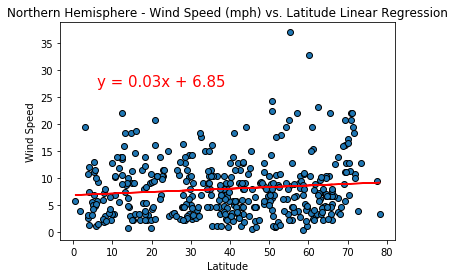

In [21]:
# Determine x and y values and cast to a specified dtype
x_values = pd.to_numeric(northern_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(northern_hemisphere['Windspeed']).astype(float)

# Calculate regression based on x and y values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Determine values to plot and annotate regression
plt.scatter(x_values,y_values,edgecolors="k")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,27),fontsize=15,color="red")

# Define title and axis labels
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.savefig("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")

# Print rvalue and analysis of regression
print(f"The r-squared is: {rvalue}")
print(f"The regression does not show any correlation between both datasets.")
print(f"A cluster of cities have lower wind speeds up to 10 mph. Fewer cities display wind speeds between 20 to 35 mph.")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.3258220499407258
The regression does show little correlation between both datasets.
Based on the regression, a cluster of cities show correlation between wind speeds decreasing and latitude increasing.


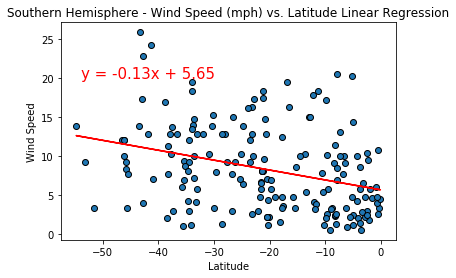

In [22]:
# Determine x and y values and cast to a specified dtype
x_values = pd.to_numeric(southern_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(southern_hemisphere['Windspeed']).astype(float)

# Calculate regression based on x and y values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Determine values to plot and annotate regression
plt.scatter(x_values,y_values,edgecolors="k")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-54,20),fontsize=15,color="red")

# Define title and axis labels
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.savefig("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")

# Print rvalue and analysis of regression
print(f"The r-squared is: {rvalue}")
print(f"The regression does show little correlation between both datasets.")
print(f"Based on the regression, a cluster of cities show correlation between wind speeds decreasing and latitude increasing.")

<b><font size ="5">Three Observable Trends</font></b>

1. Temperature has a direct correlation with latitude. The farther the latitude is from the equator, the lower the temperature. The closer the latitude is to the equator, the higher the temperature.
2. Humidity and latitude do not display any correlation with one another. Based on the plotted regression, there is an increase of Northern and Southern Hemisphere cities with high humidity above 60%. A large number of cities display high ranges in humidity.
3. Wind speeds do not show a correlation with latitude. However, the regression displays a large cluster of Northern and Southern Hemisphere cities with wind speeds between 0 to 10 mph.